In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
dataset_path = "../dataset_output/libras_ufop/libras_ufop_openpose_60_frames_augmented.csv"
output_path = "../dataset_output/libras_ufop/imgs_lopo/"

In [4]:
train = pd.read_csv(dataset_path)

In [5]:
train = train.drop("Unnamed: 0", axis=1)

In [6]:
train

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
0,1,p1_c1_s1_0,1,0.555086,0.561309,0.396433,0.547985,0.570326,0.402954,0.542236,...,0.751818,0.433051,0.966384,0.792620,0.449503,0.930953,0.673173,False,False,1.0
1,1,p1_c1_s1_0,2,0.552441,0.554763,0.376937,0.544950,0.563844,0.328017,0.539501,...,0.721404,0.431155,0.966412,0.771990,0.449501,0.928337,0.667928,False,False,1.0
2,1,p1_c1_s1_0,3,0.540484,0.558278,0.014662,0.539830,0.565252,0.043459,0.532311,...,0.745815,0.433046,0.966367,0.777363,0.449523,0.928312,0.661847,False,False,1.0
3,1,p1_c1_s1_0,4,0.539812,0.537244,0.100900,0.534094,0.548904,0.083215,0.531067,...,0.697552,0.433064,0.966390,0.749232,0.449475,0.930948,0.649300,False,False,1.0
4,1,p1_c1_s1_0,5,0.530725,0.526807,0.142478,0.524336,0.534430,0.150466,0.517610,...,0.727615,0.433072,0.966384,0.772875,0.449477,0.928342,0.647910,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468715,47,augmented3-p4_c4_s9_9,55,0.558719,0.543551,0.359298,0.554663,0.550149,0.384023,0.551655,...,0.722236,0.481820,0.903522,0.662009,0.485298,0.867864,0.600545,False,False,4.0
468716,47,augmented3-p4_c4_s9_9,56,0.557869,0.543550,0.224280,0.557763,0.555297,0.337448,0.554575,...,0.731985,0.479992,0.903571,0.660488,0.483457,0.867890,0.600386,False,False,4.0
468717,47,augmented3-p4_c4_s9_9,57,0.560119,0.565282,0.211288,0.556116,0.569323,0.395911,0.554807,...,0.734038,0.481797,0.903435,0.660955,0.485275,0.867904,0.609904,False,False,4.0
468718,47,augmented3-p4_c4_s9_9,58,0.559930,0.558377,0.262745,0.557399,0.569536,0.408430,0.556634,...,0.720383,0.479968,0.903578,0.652971,0.485295,0.867777,0.600907,False,False,4.0


In [7]:
train["category"].value_counts()

category
26    10200
21     9480
12     9420
11     9360
22     9360
25     9060
55     9060
24     9000
30     9000
34     9000
29     9000
13     8700
38     8640
49     8640
57     8640
33     8640
14     8640
15     8580
16     8580
19     8580
27     8580
35     8580
32     8580
31     8280
36     8280
50     8280
56     8280
41     8280
47     8280
10     8280
17     8280
23     8280
18     8280
3      8220
5      7920
28     7920
46     7920
37     7920
8      7920
39     7920
45     7920
44     7920
2      7920
40     7860
4      7860
52     7860
54     7860
53     7860
1      7860
51     7800
42     7800
43     7800
48     7800
9      7800
6      7500
7      7440
Name: count, dtype: int64

In [8]:
signs = list(train.columns)

In [9]:
signs = [s for s in signs if s.endswith("_x") or s.endswith("_y")]
# signs = [s for s in signs if s.startswith("hand_")]

In [10]:
signs

['hand_0_0_x',
 'hand_0_0_y',
 'hand_0_1_x',
 'hand_0_1_y',
 'hand_0_2_x',
 'hand_0_2_y',
 'hand_0_3_x',
 'hand_0_3_y',
 'hand_0_4_x',
 'hand_0_4_y',
 'hand_0_5_x',
 'hand_0_5_y',
 'hand_0_6_x',
 'hand_0_6_y',
 'hand_0_7_x',
 'hand_0_7_y',
 'hand_0_8_x',
 'hand_0_8_y',
 'hand_0_9_x',
 'hand_0_9_y',
 'hand_0_10_x',
 'hand_0_10_y',
 'hand_0_11_x',
 'hand_0_11_y',
 'hand_0_12_x',
 'hand_0_12_y',
 'hand_0_13_x',
 'hand_0_13_y',
 'hand_0_14_x',
 'hand_0_14_y',
 'hand_0_15_x',
 'hand_0_15_y',
 'hand_0_16_x',
 'hand_0_16_y',
 'hand_0_17_x',
 'hand_0_17_y',
 'hand_0_18_x',
 'hand_0_18_y',
 'hand_0_19_x',
 'hand_0_19_y',
 'hand_0_20_x',
 'hand_0_20_y',
 'hand_1_0_x',
 'hand_1_0_y',
 'hand_1_1_x',
 'hand_1_1_y',
 'hand_1_2_x',
 'hand_1_2_y',
 'hand_1_3_x',
 'hand_1_3_y',
 'hand_1_4_x',
 'hand_1_4_y',
 'hand_1_5_x',
 'hand_1_5_y',
 'hand_1_6_x',
 'hand_1_6_y',
 'hand_1_7_x',
 'hand_1_7_y',
 'hand_1_8_x',
 'hand_1_8_y',
 'hand_1_9_x',
 'hand_1_9_y',
 'hand_1_10_x',
 'hand_1_10_y',
 'hand_1_11_x',


In [11]:
excluded_body_landmarks = [10, 11, 13, 14, 19, 20, 21, 22, 23, 24]
excluded_body_landmarks = tuple([f"pose_{i}" for i in excluded_body_landmarks])
unwanted_pose_columns = [i for i in list(signs) if i.startswith(excluded_body_landmarks)]

In [12]:
signs = [s for s in signs if s not in unwanted_pose_columns]

In [13]:
columns = ["category", "video_name", "person", "frame"] + signs

In [14]:
df_signs = train[columns]

In [15]:
df_signs

,category,video_name,person,frame,hand_0_0_x,hand_0_0_y,hand_0_1_x,hand_0_1_y,hand_0_2_x,hand_0_2_y,...,pose_12_x,pose_12_y,pose_15_x,pose_15_y,pose_16_x,pose_16_y,pose_17_x,pose_17_y,pose_18_x,pose_18_y
0,1,p1_c1_s1_0,1.0,1,0.555086,0.561309,0.547985,0.570326,0.542236,0.587459,...,0.514639,0.555709,0.461662,0.207773,0.482110,0.207850,0.445322,0.226608,0.498455,0.229341
1,1,p1_c1_s1_0,1.0,2,0.552441,0.554763,0.544950,0.563844,0.539501,0.580642,...,0.512697,0.558446,0.461653,0.207796,0.482082,0.207804,0.445374,0.226669,0.498463,0.226793
2,1,p1_c1_s1_0,1.0,3,0.540484,0.558278,0.539830,0.565252,0.532311,0.594458,...,0.512706,0.558529,0.461615,0.207859,0.482085,0.207837,0.445340,0.226754,0.498474,0.226734
3,1,p1_c1_s1_0,1.0,4,0.539812,0.537244,0.534094,0.548904,0.531067,0.557425,...,0.512725,0.563872,0.461600,0.207820,0.482076,0.207838,0.445311,0.226779,0.498449,0.226816
4,1,p1_c1_s1_0,1.0,5,0.530725,0.526807,0.524336,0.534430,0.517610,0.552365,...,0.514683,0.563928,0.459604,0.207831,0.482036,0.207812,0.445294,0.229327,0.498394,0.226839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468715,47,augmented3-p4_c4_s9_9,4.0,55,0.558719,0.543551,0.554663,0.550149,0.551655,0.560038,...,0.524804,0.564363,0.461338,0.282548,0.482118,0.281089,0.447333,0.300943,0.495665,0.285384
468716,47,augmented3-p4_c4_s9_9,4.0,56,0.557869,0.543550,0.557763,0.555297,0.554575,0.572162,...,0.524878,0.564301,0.461324,0.282545,0.482118,0.281097,0.447321,0.300947,0.493879,0.285505
468717,47,augmented3-p4_c4_s9_9,4.0,57,0.560119,0.565282,0.556116,0.569323,0.554807,0.580010,...,0.524854,0.564369,0.461311,0.282546,0.482104,0.281094,0.447331,0.300980,0.493873,0.285499
468718,47,augmented3-p4_c4_s9_9,4.0,58,0.559930,0.558377,0.557399,0.569536,0.556634,0.585296,...,0.525037,0.566764,0.461315,0.282548,0.482098,0.281096,0.447319,0.300989,0.493874,0.285517


In [16]:
frames = 60

In [17]:
people = df_signs["person"].unique()
validate_people = people[-1:]
test_people = people[-2:-1]
train_people = people[:-2]

In [18]:
def get_dataset_path(person):
    if person in train_people:
        return "train"
    if person in test_people:
        return "test"
    return "validate"

In [19]:
def reshape_features_dataset(features):
    return features.reshape((int(features.shape[0]/frames), frames, features.shape[1]))

def reshape_target_dataset(target):
    return target.reshape((int(target.shape[0]/frames), frames))[:, 0]

In [20]:
def get_axis_df(df, axis):
    return df[[c for c in signs if c.endswith(axis)]]

In [21]:
def normalize_landmark_name(name):
    splited_name = name.split("-")
    landmark_name = splited_name[1]
    landmark_number = splited_name[2].rjust(3, "0")
    return f"{landmark_name}-{landmark_number}"

In [22]:
def create_folder(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [23]:
def landmarks_to_image(x, y, n=3, normalize=False):
    # Remove cols until the width is multiple of n
    width = x.shape[1]
    if width % n != 0:
        extra_cols = width % n
        x = x[:, : width - extra_cols]
        y = y[:, : width - extra_cols]

    X = np.reshape(x, (x.shape[0], -1, n))
    Y = np.reshape(y, (y.shape[0], -1, n))
    I = np.concatenate([X, Y], axis=1)
    return I

In [24]:
def normalize_axis(axis):
    axis[axis < 0] = 0
    axis[axis > 1] = 1
    return axis

In [25]:
videos = df_signs["video_name"].unique()
print(len(videos))
videos

7016


array(['p1_c1_s1_0', 'p1_c1_s1_1', 'p1_c1_s1_2', ...,
       'augmented3-p2_c4_s9_6', 'augmented3-p3_c4_s9_6',
       'augmented3-p4_c4_s9_9'], dtype=object)

In [26]:
total_videos = len(videos)
current_video = 0
for video in videos:
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    df_video = df_signs[df_signs["video_name"] == video].sort_values("frame")
    category = df_video.iloc[0]["category"]
    person = df_video.iloc[0]["person"]
    if len(video) > frames:
        print("Video > frames")
        break
    if video.startswith("augmented") and person not in train_people:
        continue
    df = df_video.drop(["category", "video_name", "frame"], axis=1)
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.T.to_numpy()
    y = y.T.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, get_dataset_path(person), str(category), f"{video}.png")
    create_folder(os.path.join(output_path, get_dataset_path(person), str(category)))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

Current Video: 500 of 7016
Current Video: 1000 of 7016
Current Video: 1500 of 7016
Current Video: 2000 of 7016
Current Video: 2500 of 7016
Current Video: 3000 of 7016
Current Video: 3500 of 7016
Current Video: 4000 of 7016
Current Video: 4500 of 7016
Current Video: 5000 of 7016
Current Video: 5500 of 7016
Current Video: 6000 of 7016
Current Video: 6500 of 7016
Current Video: 7000 of 7016


In [46]:
total_videos = len(df_signs)
current_video = 0
for i in df_signs.iterrows():
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    row = i[1]
    df = pd.read_parquet(base_path + row["path"])
    df = df[df["type"].isin(["left_hand", "right_hand"])]
    df["landmark"] = df["row_id"].apply(lambda i: normalize_landmark_name(i))
    df = df.sort_values("landmark")
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.to_numpy()
    y = y.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, row["sign"], f"{row['participant_id']}-{row['sequence_id']}.png")
    create_folder(os.path.join(output_path, row["sign"]))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

NameError: name 'base_path' is not defined

In [163]:
row

path              train_landmark_files/32319/2093201419.parquet
participant_id                                            32319
sequence_id                                          2093201419
sign                                                        not
Name: 26477, dtype: object

In [130]:
row

path              train_landmark_files/26734/1000035562.parquet
participant_id                                            26734
sequence_id                                          1000035562
sign                                                       blow
Name: 0, dtype: object

In [122]:
X = np.array_split(x, x.shape[1] // 3, axis=1)
X = np.stack(X, axis=1)
Y = np.array_split(y, y.shape[1] // 3, axis=1)
Y = np.stack(Y, axis=1)
X.shape

ValueError: all input arrays must have the same shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


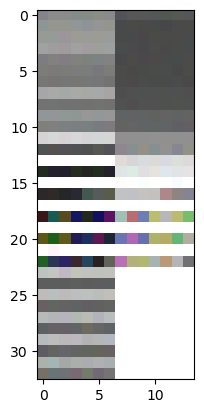

In [128]:
plt.imshow(landmarks_to_image(x, y))

In [97]:
x = df.copy()
x["landmark"] = df["row_id"].apply(lambda i: "-".join(i.split("-")[1:]))
x_values = {}
for l in x["landmark"].unique():
    x_values[l] = x[x["landmark"] == l]["x"].values
x_values
pd.DataFrame.from_dict(x_values).T
# x = x[["landmark", "x"]]
# x = pd.melt(x[["landmark", "x"]], id_vars=['landmark'], value_vars=['x'])
# x = x.set_index("landmark")
# x["x"].values.reshape(())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
face-0,0.494400,0.501150,0.498471,0.506406,0.507809,0.512282,0.519686,0.526654,0.534279,0.537974,...,0.539496,0.540863,0.539631,0.538870,0.537460,0.538041,0.536197,0.535788,0.535696,0.536416
face-1,0.496017,0.492906,0.491770,0.496547,0.502923,0.505973,0.511610,0.515489,0.524356,0.534715,...,0.540774,0.541330,0.541150,0.540376,0.539333,0.538957,0.537321,0.537178,0.535058,0.535971
face-2,0.500818,0.498327,0.497680,0.502239,0.508405,0.512122,0.517218,0.519985,0.527824,0.537330,...,0.542549,0.543044,0.542850,0.542128,0.541073,0.540639,0.539162,0.538990,0.537231,0.537866
face-3,0.489788,0.487708,0.487321,0.491887,0.498103,0.502142,0.508275,0.512669,0.520244,0.529460,...,0.535133,0.535540,0.535418,0.534454,0.533305,0.532867,0.531290,0.530816,0.528941,0.529734
face-4,0.495304,0.492322,0.491236,0.496049,0.502395,0.505442,0.511242,0.515550,0.524563,0.534917,...,0.541114,0.541668,0.541508,0.540682,0.539613,0.539233,0.537561,0.537360,0.535184,0.536143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
right_hand-16,0.422241,0.440972,0.460872,0.467546,0.473871,0.473521,0.445551,0.401285,0.320296,0.217971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001660
right_hand-17,0.282980,0.304759,0.321579,0.326890,0.337585,0.325513,0.305635,0.272736,0.233316,0.185122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042694
right_hand-18,0.313736,0.335886,0.358558,0.365960,0.372476,0.352425,0.326248,0.282339,0.221445,0.150808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006723
right_hand-19,0.350728,0.377429,0.400531,0.403416,0.414791,0.390784,0.352488,0.299400,0.220874,0.132357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014755


In [58]:
df[df["type"] == "pose"].sort_values("row_id")

,frame,row_id,type,landmark_index,x,y,z
489,20,20-pose-0,pose,0,0.524597,0.329134,-0.976228
490,20,20-pose-1,pose,1,0.566472,0.284107,-0.913417
499,20,20-pose-10,pose,10,0.482853,0.377581,-0.780198
500,20,20-pose-11,pose,11,0.830147,0.563290,-0.303732
501,20,20-pose-12,pose,12,0.312736,0.523624,-0.185898
...,...,...,...,...,...,...,...
12440,42,42-pose-5,pose,5,0.487127,0.295725,-0.969664
12441,42,42-pose-6,pose,6,0.467742,0.296605,-0.969754
12442,42,42-pose-7,pose,7,0.664733,0.318926,-0.587208
12443,42,42-pose-8,pose,8,0.449085,0.320256,-0.447975


In [57]:
df["type"].value_counts()

face          10764
pose            759
left_hand       483
right_hand      483
Name: type, dtype: int64